#### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import gradio as gr

C:\Users\Acer\anaconda3\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load the Dataset

In [2]:
df = pd.read_csv("House_Price_Dataset.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Dataset Overview

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Check for Missing Values

In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Visualize Target (Price) Distribution

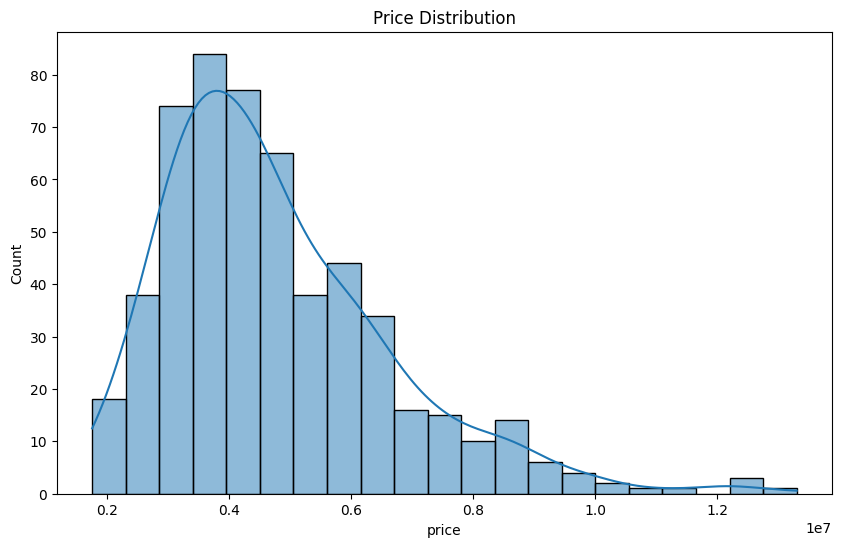

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()

#### Furnishing Status Count Plot

C:\Users\Acer\AppData\Local\Temp\ipykernel_13028\915014767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="furnishingstatus", data=df, palette="Set2")


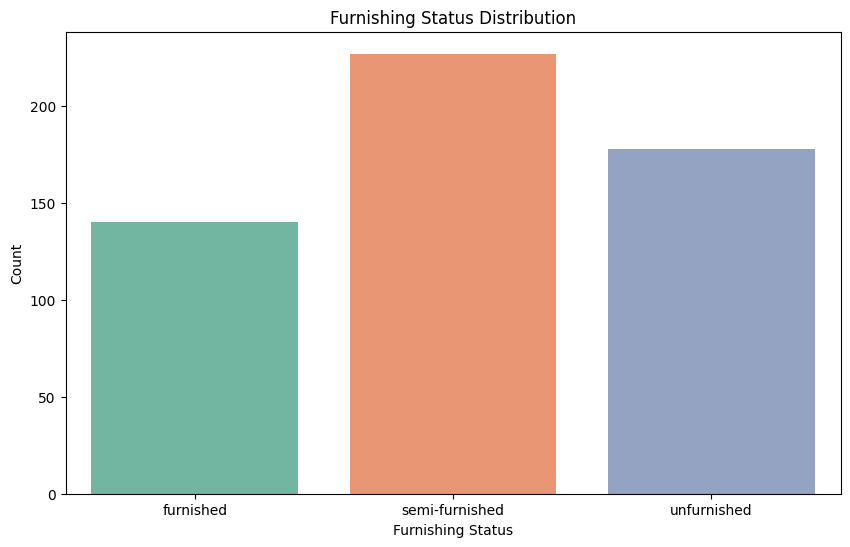

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x="furnishingstatus", data=df, palette="Set2")
plt.title("Furnishing Status Distribution")
plt.ylabel("Count")
plt.xlabel("Furnishing Status")
plt.show()

#### Numeric Feature Distributions

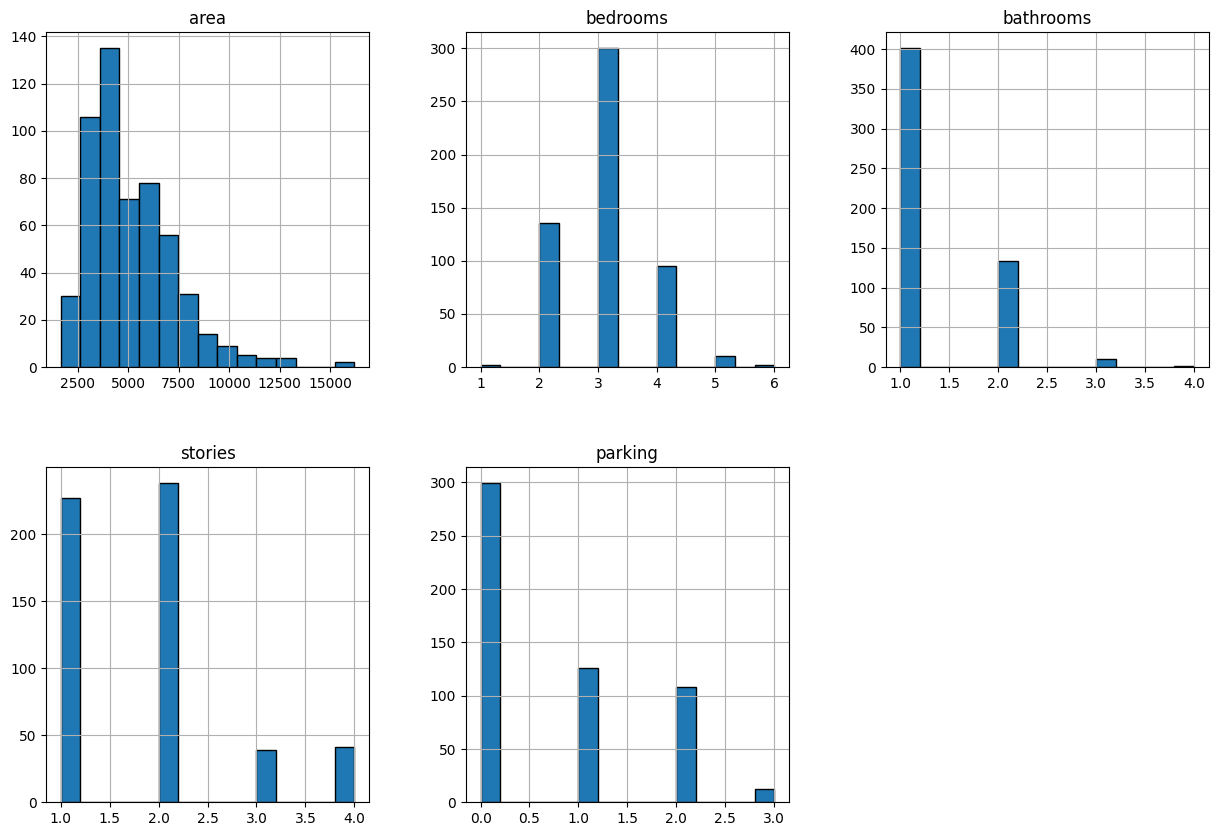

<Figure size 1000x600 with 0 Axes>

In [7]:
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(2, 3), edgecolor='black')
plt.figure(figsize=(10, 6))
plt.suptitle("Distribution of Numeric Features")
plt.show()

#### Correlation Heatmap (Numerical Only)

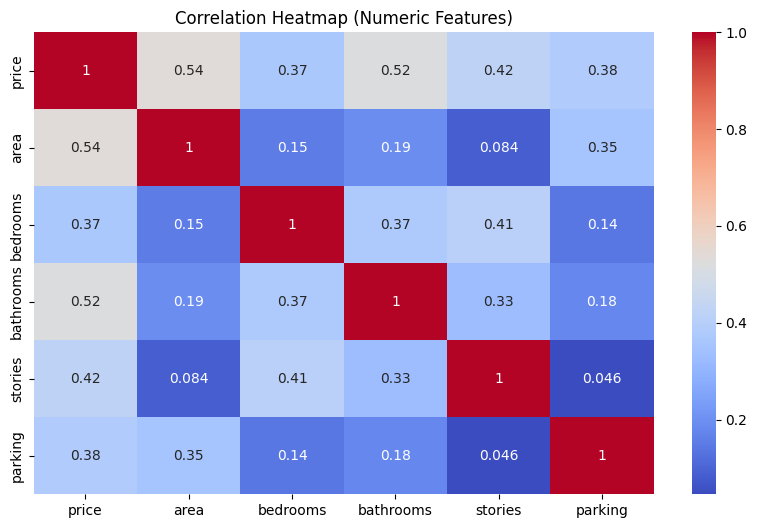

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

#### Pairplot of Key Features

<Figure size 1000x600 with 0 Axes>

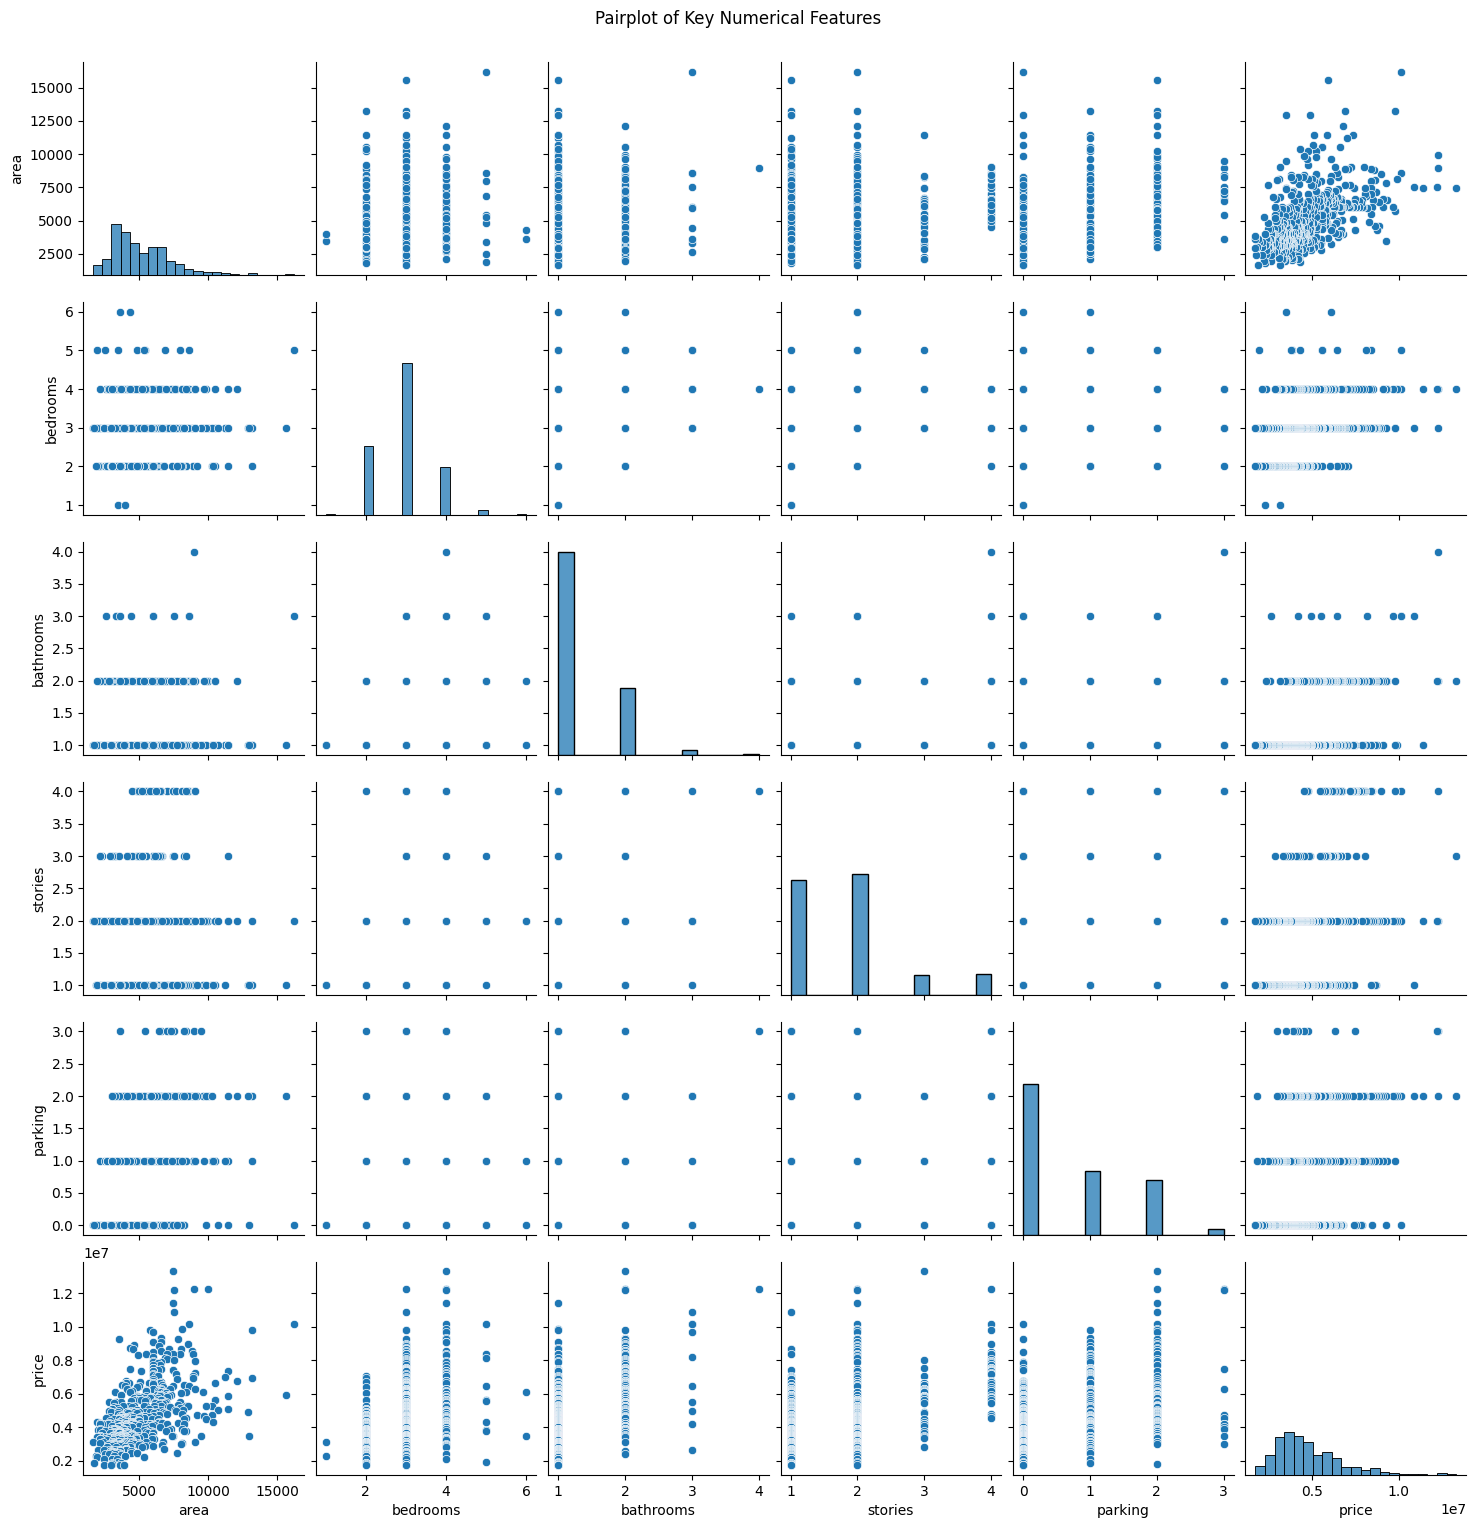

In [9]:
selected_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
plt.figure(figsize=(10, 6))
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

#### Boxplot: Price by Stories

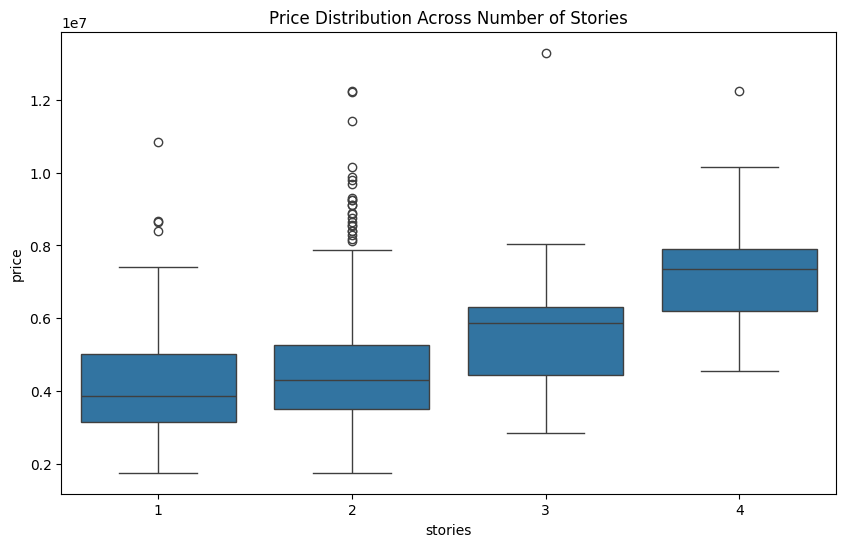

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="stories", y="price", data=df)
plt.title("Price Distribution Across Number of Stories")
plt.show()

#### Violin Plot: Price by Air Conditioning

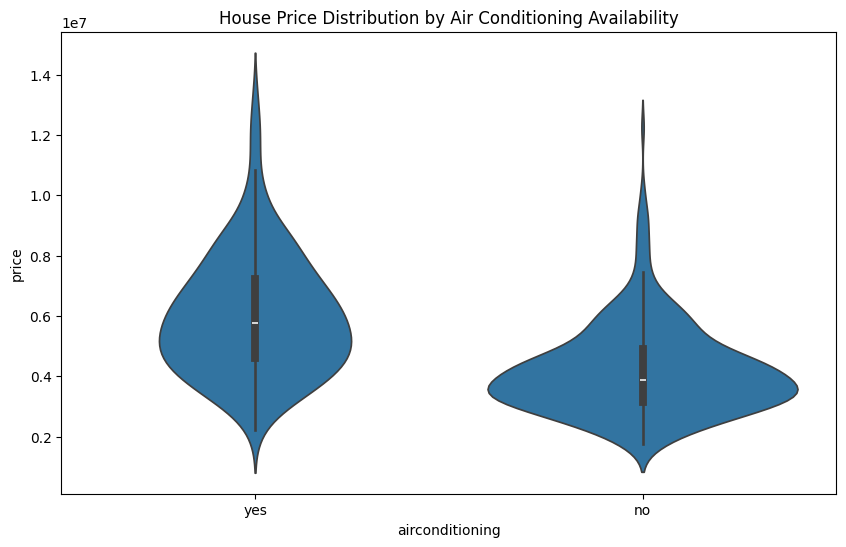

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="airconditioning", y="price", data=df)
plt.title("House Price Distribution by Air Conditioning Availability")
plt.show()

#### Boxplot: Price by Bedrooms

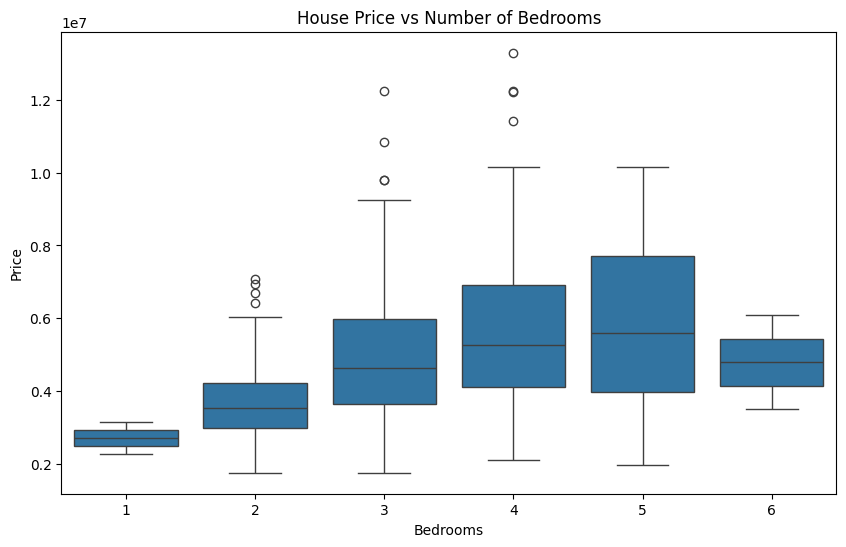

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("House Price vs Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

#### Area vs Price Scatterplot

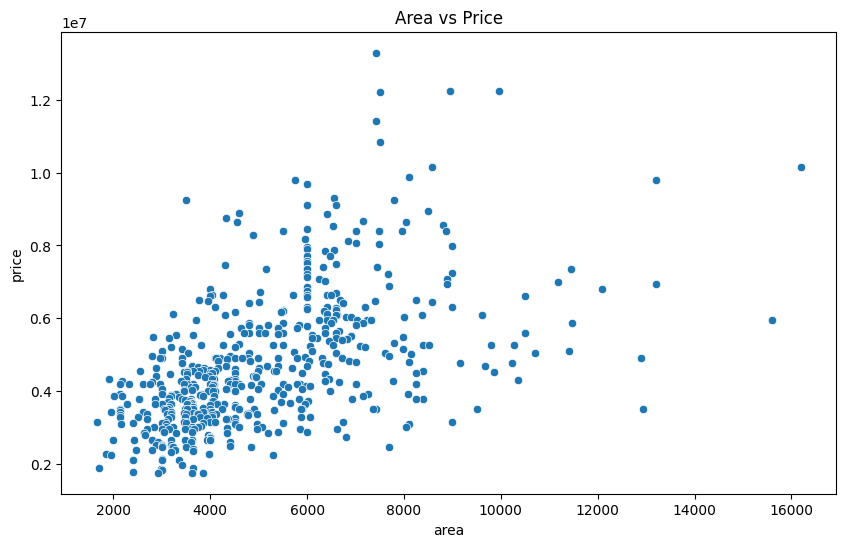

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="area", y="price", data=df)
plt.title("Area vs Price")
plt.show()

#### Define Features and Target Variable

In [14]:
X = df.drop("price", axis=1)
y = df["price"]

#### Define Column Types

In [15]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#### Preprocessing Pipeline

In [16]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

#### Create Linear Regression Pipeline

In [17]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

#### Train/Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### Train the Model

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('model', LinearRegression())])

#### Evaluate Model Performance

In [20]:
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: ₹{rmse:,.0f}")
print(f"R² Score: {r2:.4f}")

RMSE: ₹1,324,507
R² Score: 0.6529


#### Actual vs Predicted Price Plot

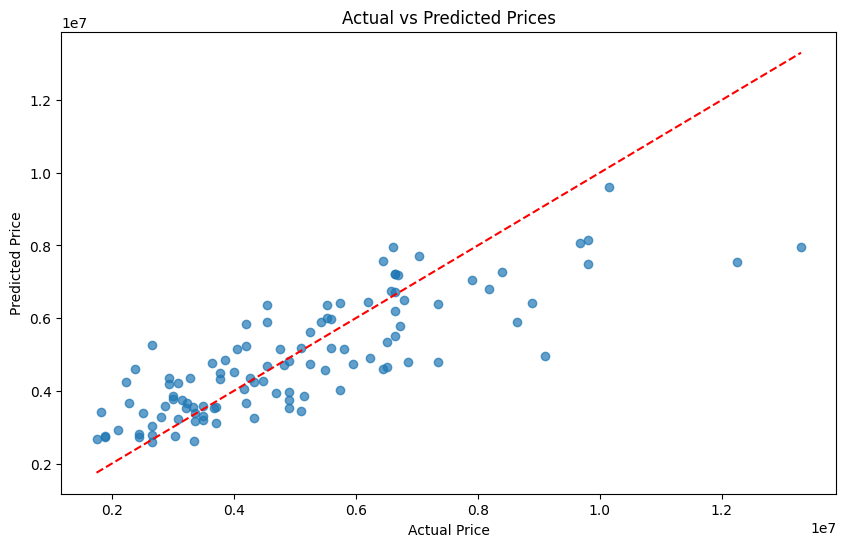

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

#### Save the Trained Model

In [22]:
joblib.dump(pipeline, "House_Price_Model.pkl")

['House_Price_Model.pkl']

#### Gradio UI for Prediction

In [23]:
def predict_price(area, bedrooms, bathrooms, stories, parking, mainroad,
                  guestroom, basement, hotwaterheating, airconditioning, 
                  prefarea, furnishingstatus):

    input_df = pd.DataFrame([{
        "area": area,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "stories": stories,
        "parking": parking,
        "mainroad": mainroad,
        "guestroom": guestroom,
        "basement": basement,
        "hotwaterheating": hotwaterheating,
        "airconditioning": airconditioning,
        "prefarea": prefarea,
        "furnishingstatus": furnishingstatus
    }])
    
    model = joblib.load("House_Price_Model.pkl")
    prediction = model.predict(input_df)[0]
    return f"Predicted House Price: ₹{prediction:,.0f}"

gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Area (sq ft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Stories"),
        gr.Number(label="Parking Spots"),
        gr.Dropdown(["yes", "no"], label="Main Road"),
        gr.Dropdown(["yes", "no"], label="Guest Room"),
        gr.Dropdown(["yes", "no"], label="Basement"),
        gr.Dropdown(["yes", "no"], label="Hot Water Heating"),
        gr.Dropdown(["yes", "no"], label="Air Conditioning"),
        gr.Dropdown(["yes", "no"], label="Preferred Area"),
        gr.Dropdown(["furnished", "semi-furnished", "unfurnished"], label="Furnishing Status"),
    ],
    outputs="text",
    title=" House Price Prediction App"
).launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
